In [1]:
import mariadb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#connecting to db
db = mariadb.connect(
    host = "127.0.0.1",
    port = 3306,
    user = "fsnap",
    password = "rosco",
    database = "data"
)

#load a table into a DataFrame function
def load_table_dataframe(table_name, conn):
    query = f"SELECT * FROM {table_name};"
    dataframe = pd.read_sql(query, conn)
    return dataframe

#Load tables into dataframes
department_df = load_table_dataframe("Department", db)
employee_df = load_table_dataframe("Employee", db)
students_df = load_table_dataframe("Students", db)
performance_df = load_table_dataframe("Performance", db)

#Display the first few rows of each dataframe to verify data
print("Department Info:")
print(department_df.head())

print("\nEmployee Information:")
print(employee_df.head())

print("\nStudent Council Info:")
print(students_df.head())

print("\nStudent Performance:")
print(performance_df.head())


/var/folders/g7/vq28k0zn3tl8zbf_zxqmkyvc0000gn/T/ipykernel_58452/1871742712.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql(query, conn)


Department Info:
  Department_ID                                    Department_Name        DOE
0     IDEPT1096                               School of Management   3/7/2000
1     IDEPT1142  Centre for Aerospace Systems Design and Engine...  7/25/1966
2     IDEPT1367                               Computer Centre (CC)   4/5/2001
3     IDEPT1378                           Industrial Design Centre  2/16/1993
4     IDEPT1388                    Centre for Policy Studies (CPS)   1/5/1999

Employee Information:
  Employee_ID        DOB         DOJ Department_ID
0    IU112687  6/18/1982    9/3/2012     IDEPT5127
1    IU114595  8/20/1986  11/13/2001     IDEPT4055
2    IU114836  3/24/1985   9/23/2007     IDEPT2601
3    IU116135  1/10/1993   2/19/2002     IDEPT4055
4    IU116424  11/5/1975   4/22/2005     IDEPT1423

Student Council Info:
    Student_ID       DOA        DOB Department_Choices Department_Admission
0  SID20131143  7/1/2013   2/5/1996          IDEPT7783            IDEPT7783
1  SID20131

In [2]:
#Now we can move on to the descriptive statistics
print ("\nDepartment Data - Descriptive Statistics:")
print(department_df.describe(include='all'))

print ("\nEmployee Data - Descriptive Statistics:")
print(employee_df.describe(include='all'))

print ("\nStudents Data - Descriptive Statistics:")
print(students_df.describe(include='all'))

print ("\nPerformance Data - Descriptive Statistics:")
print(performance_df.describe())


Department Data - Descriptive Statistics:
       Department_ID       Department_Name       DOE
count             42                    42        42
unique            42                    42        42
top        IDEPT1096  School of Management  3/7/2000
freq               1                     1         1

Employee Data - Descriptive Statistics:
       Employee_ID        DOB        DOJ Department_ID
count          998        998        998           998
unique         998        934        918            34
top       IU112687  10/2/1992  9/23/2007     IDEPT5109
freq             1          3          3            42

Students Data - Descriptive Statistics:
         Student_ID       DOA        DOB Department_Choices  \
count          3995      3995       3995               3995   
unique         3818         6       1798                 41   
top     SID20162976  7/1/2015  5/21/1997          IDEPT6347   
freq              3       691          9                118   

       Department_A

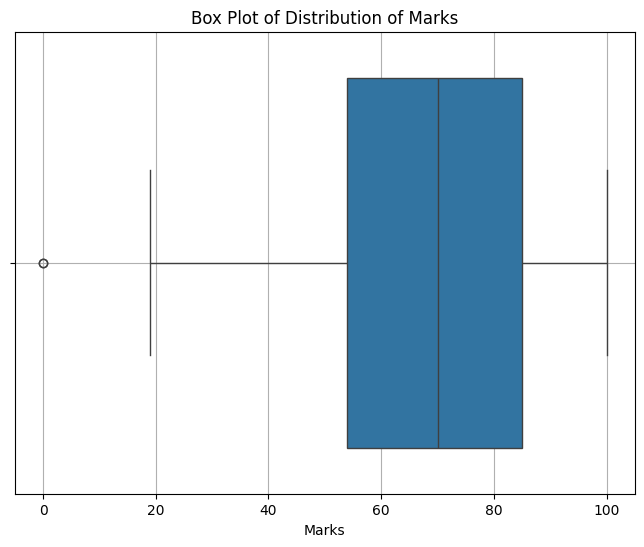

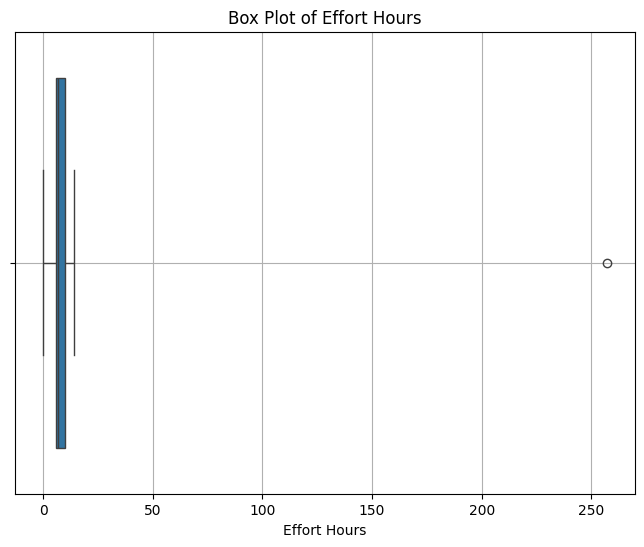

In [3]:
#Now we are going to visualize the Marks Distribution by looking at a boxplot:

plt.figure(figsize=(8, 6))
sns.boxplot(data=performance_df, x='Marks')
plt.xlabel("Marks")
plt.title("Box Plot of Distribution of Marks")
plt.grid(True)
plt.show()

#Now a box plot for effort hours
plt.figure(figsize=(8, 6))
sns.boxplot(data=performance_df, x='Effort_Hours')
plt.xlabel("Effort Hours")
plt.title("Box Plot of Effort Hours")
plt.grid(True)
plt.show()


Box Plot of Marks and Effort Hours
- Purpose: The box plot is used to identify outliers we have and to understand the spread and distribution of data. It shows the minimum, first quartile, median, third quartile, and maximimum of a dataset. 
- Why we use this: In this project, we are trying to understand the distribution of Marks and Effort_Hours so we can detect any anomalies and outliers. These anomlies can affect the data's accuracy for both the descriptive and the predictive analysis. Box plots help identify any unusla values that may need further cleaning. 
- In our case, we can see that we have an outlier but to further confirm this, we can do the following calculation for IQR for effort hours.
IQR is the interquartile range and essentially, anything that extends to 1.5 times the IQR is considered an outlier.
This code below is meant to return the rows where effort_hours falls outside the range. 

In [4]:
# Calculate the IQR for Effort_Hours
Q1 = performance_df['Effort_Hours'].quantile(0.25)
Q3 = performance_df['Effort_Hours'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = performance_df[(performance_df['Effort_Hours'] < lower_bound) | (performance_df['Effort_Hours'] > upper_bound)]
print("Outliers in Effort_Hours:")
print(outliers)


Outliers in Effort_Hours:
         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
209542  SID20189989        Sem_8  SEMI0081794    Paper 5     47           257


Once we know which particular student is the outlier, we can remove them from the data at hand in order to better clean up the Graph. 

In [5]:
# Remove the identified outlier
performance_df = performance_df[performance_df['Effort_Hours'] <= upper_bound]


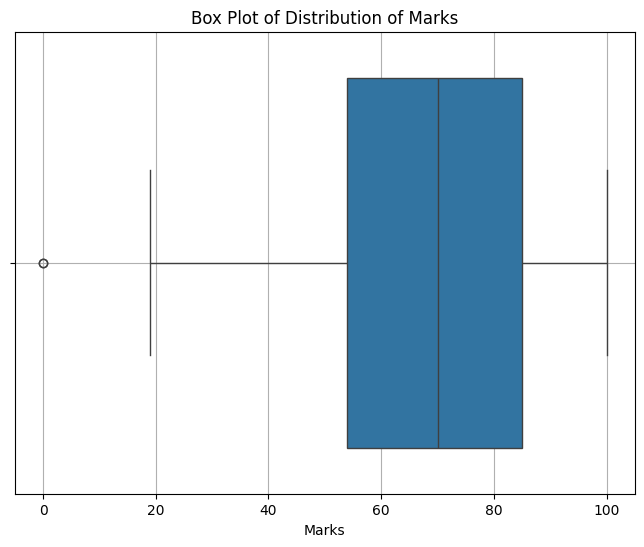

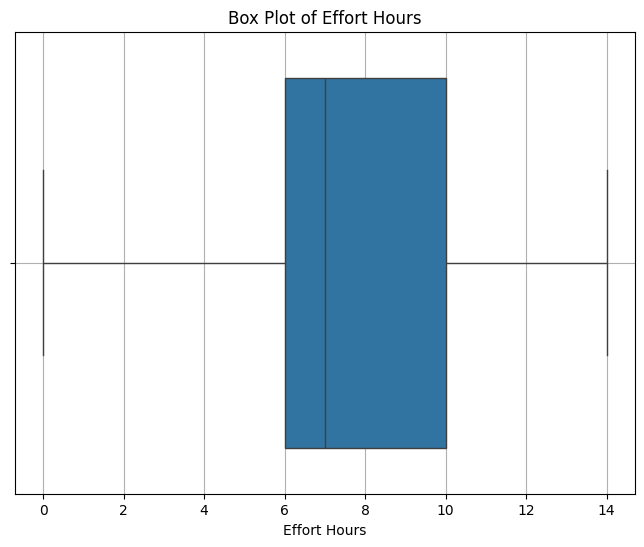

In [6]:
#Now we are going to visualize the box plots again:

plt.figure(figsize=(8, 6))
sns.boxplot(data=performance_df, x='Marks')
plt.xlabel("Marks")
plt.title("Box Plot of Distribution of Marks")
plt.grid(True)
plt.show()

#Now a box plot for effort hours
plt.figure(figsize=(8, 6))
sns.boxplot(data=performance_df, x='Effort_Hours')
plt.xlabel("Effort Hours")
plt.title("Box Plot of Effort Hours")
plt.grid(True)
plt.show()


We can notice they look so much more consistent now. 

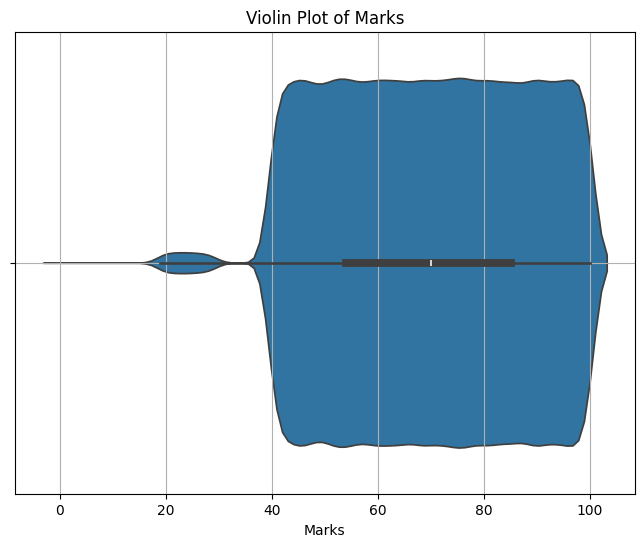

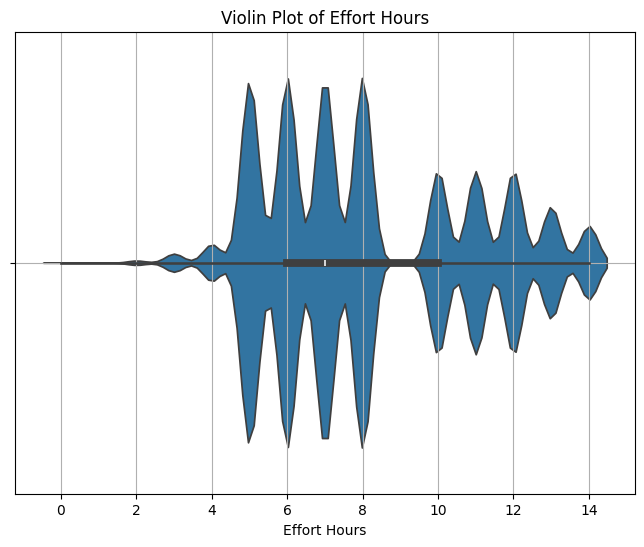

In [7]:
#now a violin plot to show distribution and density of marks
plt.figure(figsize=(8, 6))
sns.violinplot(data=performance_df, x='Marks')
plt.xlabel("Marks")
plt.title("Violin Plot of Marks")
plt.grid(True)
plt.show()

#Violin plot for effort hours
plt.figure(figsize=(8, 6))
sns.violinplot(data=performance_df, x='Effort_Hours')
plt.xlabel("Effort Hours")
plt.title("Violin Plot of Effort Hours")
plt.grid(True)
plt.show()

Violin Plot of Marks:
- Shape and Spread: The violin plot of Marks shows a relatively flat distribution from 40 to 100, indicating that most students marks are spread consistently across this range. Theres a concentration of students closer to the 100 suggesting that a good number of students are doing well. 
- Outliers: The visible tail extending below 40 suggests the presence of some lower marks. This aligns with what we have observed in other plots.
- Interpretation: The even distribution between 40 and 100 could imply that the grading system results in a broad range of marks without a specific concentration in a particular grade. The slight peak near the upper range might indicate a trend towards high performance. 

Violin Plot of Effort Hours:
- Shape and Spread: The effort_hours plot is distinctive and a multi-modal shape with peaks at various intervals. These are notable around 4,6,8, and 12 hours. This suggests that students' efforts are not continous but clustered rather arond specific values. 
- Interpretation of peaksL The peaks reflect structured study patterns or the allocation of standard hours for exams/assignments. The prescense of peaks indicates that there isnt a uniform amount of effort spent but rather a variety of common effort levels.
- Density: The width between each peak in the plot indicates how many students fall within that effort range. 

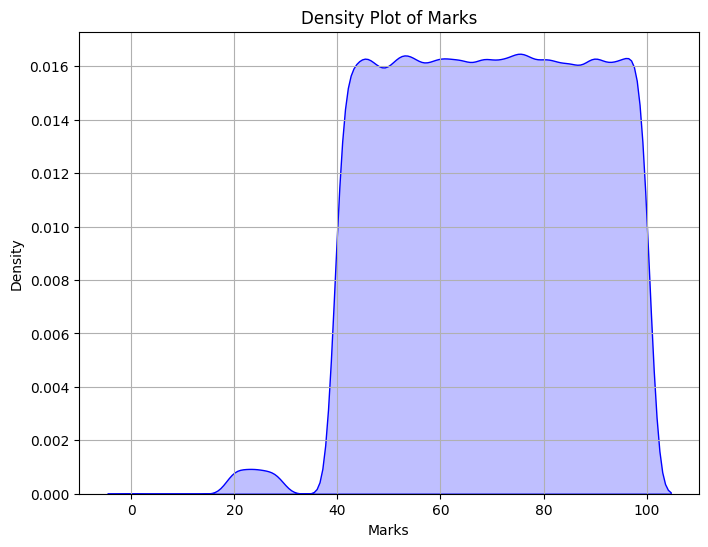

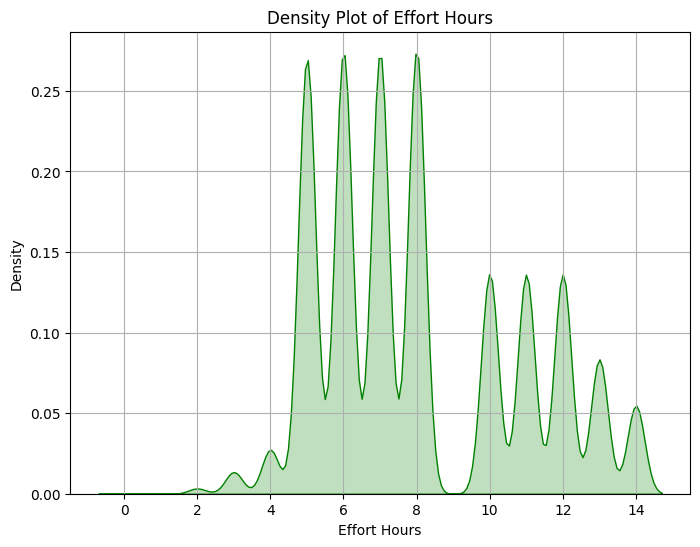

In [8]:
# Density plot for Marks to understand probability distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(performance_df['Marks'], fill=True, color="blue")
plt.xlabel("Marks")
plt.title("Density Plot of Marks")
plt.grid(True)
plt.show()

# Density plot for Effort Hours to understand probability distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(performance_df['Effort_Hours'], fill=True, color="green")
plt.xlabel("Effort Hours")
plt.title("Density Plot of Effort Hours")
plt.grid(True)
plt.show()

Density Plot for Marks:
- The density plot shows a relatively uniform distribution for scores between 40 and 100 with a small peak below 40, therefore indicating some students have scored lower marks
- the flat distribution suggests that students score across this range eithout strong concentraton at any particular score
- this plot helps us visualize the overall speed and frequency of marks which is useful in assessing the performance trends across students

Density Plot for Effort Hours
- the density plot for effort hours shows a multimodal distribution with distinct peaks.
- this pattern suggests that effort hours are clustered around specific values, likely due to structured assignments
- this plot helps us understand the study effort distribution and identifies where students tend to concentrate their study hours. the multimodal nature could indicate different study strategies

The violin plot shows both distribution and central tendency with a more condensed view, while the density plot emphasizes probability density across values.


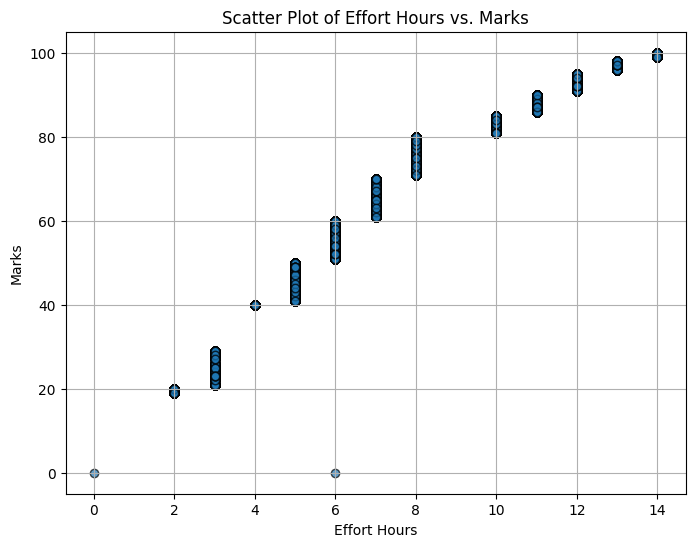

In [9]:
# Plotting Effort_Hours vs. Marks
plt.figure(figsize=(8, 6))
plt.scatter(performance_df['Effort_Hours'], performance_df['Marks'], alpha=0.7, edgecolors='k')

# Adding titles and labels
plt.title("Scatter Plot of Effort Hours vs. Marks")
plt.xlabel("Effort Hours")
plt.ylabel("Marks")
plt.grid(True)

# Display the plot
plt.show()

The scatter plot shows a general upward trend which indicates a positive correlation between effort_hours and marks. 
This suggests that on average, students who spend more hours studying tend to achieve higher marks.
The distribution points moving from the bottom-left to the top right reinforces this relationship.

The data points also appear to be following a linear pattern, where increases in effort_hours consistently leads to increase in marks.
This visual pattern suggests that a linear regression model could be appropriate for predicting marks
